# Research on apartment sales ads

Data from a real estate agency is being used in this project. It is an archive of sales ads for realty in St. Petersburg, Russia, and the surrounding areas collected over the past few years. I will learn how to determine the market value of real estate properties. The task is to define the parameters. This will make it possible to build an automated system that is capable of detecting anomalies and fraudulent activity.

There are two different types of data available for every apartment for sale. The first type is a user’s input. The second type is received automatically based upon the map data. For example, the distance from the city center, airport, the nearest park or body of water. 

### Step 1. Open the data file and study the general information. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

real_estate = pd.read_csv('/datasets/real_estate_data_us.csv', sep='\t')
real_estate.head()

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
0,2019-03-07T00:00:00,NaN,260000.0,3,25.0,51.0,108.0,NaN,2.70,16.0,...,NaN,False,False,Saint Petersburg,18863.0,16028.0,482.0,1.0,755.0,2.0
1,2018-12-04T00:00:00,81.0,67000.0,1,11.0,18.6,40.4,2.0,NaN,11.0,...,NaN,False,False,Shushary village,12817.0,18603.0,NaN,0.0,NaN,0.0
2,2015-08-20T00:00:00,558.0,103920.0,2,8.3,34.3,56.0,0.0,NaN,5.0,...,NaN,False,False,Saint Petersburg,21741.0,13933.0,90.0,1.0,574.0,2.0
3,2015-07-24T00:00:00,424.0,1298000.0,3,NaN,NaN,159.0,0.0,NaN,14.0,...,NaN,False,False,Saint Petersburg,28098.0,6800.0,84.0,2.0,234.0,3.0
4,2018-06-19T00:00:00,121.0,200000.0,2,41.0,32.0,100.0,NaN,3.03,14.0,...,NaN,False,False,Saint Petersburg,31856.0,8098.0,112.0,2.0,48.0,1.0


In [2]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
date_posted          23699 non-null object
days_listed          20518 non-null float64
last_price           23699 non-null float64
bedrooms             23699 non-null int64
kitchen_area         21421 non-null float64
living_area          21796 non-null float64
total_area           23699 non-null float64
balconies            12180 non-null float64
ceiling_height       14504 non-null float64
floors_total         23613 non-null float64
floor                23699 non-null int64
total_images         23699 non-null int64
bike_parking         2775 non-null object
is_studio            23699 non-null bool
is_open_plan         23699 non-null bool
locality_name        23650 non-null object
airport_dist         18157 non-null float64
city_center_dist     18180 non-null float64
park_dist            8079 non-null float64
parks_within_3000    18181 non-null float64
pond_dist            9110 no

### Conclusion

<i> The dataset has a dimension of 23699 lines and 22 columns. It has four dtypes: bool, float64, int64, object. Some datatype needs to be change as it is like the date. Some columns have missing values. <i/>

### Step 2. Data preprocessing

##### Determine and study the missing values:
- A practical replacement can be presumed for some missing values. For example, if the user doesn’t enter the number of balconies, then there probably aren’t any. The correct course of action here is to replace these missing values with 0. There’s no suitable replacement value for other data types. In this case, leave these values blank. A missing value is also a key indicator that mustn’t be hidden.
- Fill in the missing values where appropriate. Explain why you’ve chosen to fill the missing values in these particular columns and how you selected the values.
- Describe the factors that may have led up to the missing values.

In [3]:
# it counts the missing values in each column
real_estate.isnull().sum()

date_posted              0
days_listed           3181
last_price               0
bedrooms                 0
kitchen_area          2278
living_area           1903
total_area               0
balconies            11519
ceiling_height        9195
floors_total            86
floor                    0
total_images             0
bike_parking         20924
is_studio                0
is_open_plan             0
locality_name           49
airport_dist          5542
city_center_dist      5519
park_dist            15620
parks_within_3000     5518
pond_dist            14589
ponds_within_3000     5518
dtype: int64

In [4]:
real_estate['days_listed'] = real_estate['days_listed'].fillna((real_estate['days_listed'].median()))
real_estate['kitchen_area'] = real_estate['kitchen_area'].fillna((real_estate['kitchen_area'].median()))
real_estate['living_area'] = real_estate['living_area'].fillna((real_estate['living_area'].median()))
real_estate['balconies'] = real_estate['balconies'].replace(np.nan, 0)
real_estate['ceiling_height'] = real_estate['ceiling_height'].fillna((real_estate['ceiling_height'].median()))
real_estate['floors_total'] = real_estate['floors_total'].mask(pd.isnull, real_estate['floor'])
real_estate['bike_parking'] = real_estate['bike_parking'].replace(np.nan, 0)
real_estate['locality_name'] = real_estate['locality_name'].replace(np.nan, 'no info')
real_estate['airport_dist'] = real_estate['airport_dist'].fillna((real_estate['airport_dist'].median()))
real_estate['city_center_dist'] = real_estate['city_center_dist'].fillna((real_estate['city_center_dist'].median()))
real_estate['park_dist'] = real_estate['park_dist'].fillna((real_estate['park_dist'].median()))
real_estate['parks_within_3000'] = real_estate['parks_within_3000'].replace(np.nan, 0)
real_estate['pond_dist'] = real_estate['pond_dist'].fillna((real_estate['pond_dist'].median()))
real_estate['ponds_within_3000'] = real_estate['ponds_within_3000'].replace(np.nan, 0)

<i> After looking at the dataset, I performed the following changes to replace the missing values:
    - for 'balconies' column, I changed the missing values to 0 because it is possible to have an appartement without balconie.
    - for 'bike_parking', 'parks_within_3000', 'ponds_within_3000' columns, I changed the missing values in these columns to 0 as these suppose to be boolean type and 0 implies to False after dtypes conversion.
    - for 'days_listed', 'kitchen_area', 'living_area', 'ceiling_height', 'city_center_dist', 'park_dist', and 'pond_dist' columns, the missing values are significant so I cannot ignore them, and as their distribution are skewed, then it is resonable to replace the missing value with median.
    - for 'locality_name' column, I replace the missing values as 'no info' because the datatype will be changed as object later.
    - for 'floor_total', it is resonable to change the missing values with its corresponsing 'floor' rather than deleting them.

##### Convert the data to the required types:
- Indicate the columns where the data types have to be changed and explain why.

In [5]:
real_estate['balconies'] = real_estate['balconies'].astype(int)
real_estate['days_listed'] = real_estate['days_listed'].astype(int)
real_estate['bike_parking'] = real_estate['bike_parking'].astype(bool)
real_estate['parks_within_3000'] = real_estate['parks_within_3000'].astype(int)
real_estate['ponds_within_3000'] = real_estate['ponds_within_3000'].astype(int)
real_estate['date_posted'] = pd.to_datetime(real_estate['date_posted'], format='%Y/%m/%d %H:%M:%S')
real_estate.dtypes

date_posted          datetime64[ns]
days_listed                   int64
last_price                  float64
bedrooms                      int64
kitchen_area                float64
living_area                 float64
total_area                  float64
balconies                     int64
ceiling_height              float64
floors_total                float64
floor                         int64
total_images                  int64
bike_parking                   bool
is_studio                      bool
is_open_plan                   bool
locality_name                object
airport_dist                float64
city_center_dist            float64
park_dist                   float64
parks_within_3000             int64
pond_dist                   float64
ponds_within_3000             int64
dtype: object

<i>The necessary datatypes of some columns have been updated to the correct on according to the description of the dataset and their types, such as date, number of days when the house has been posted, etc...<i/>

### Step 3. Make calculations and add them to the table

- the price per square meter
- the day of the week, month, and year that the ad was published
- which floor the apartment is on (first, last, or other)
- the ratio between the living space and the total area, as well as between the kitchen space and the total area.

In [6]:
real_estate['price_sqm'] = real_estate['last_price'] / real_estate['total_area']
real_estate['day_published'] = real_estate['date_posted'].dt.weekday
real_estate['month_published'] = real_estate['date_posted'].dt.month
real_estate['year_published'] = real_estate['date_posted'].dt.year
real_estate['ratio_livtot_area'] = real_estate['living_area'] / real_estate['total_area']
real_estate['ratio_kittot_area'] = real_estate['kitchen_area'] / real_estate['total_area']

In [7]:
def floor_grouping(row):
    if row['floor'] == 1:
        return 'first'
    elif row['floor'] == row['floors_total']:
        return 'last'
    else:
        return 'other'

real_estate['which_floor'] = real_estate.apply(floor_grouping,axis=1)
real_estate['which_floor'].value_counts()

other    17363
last      3419
first     2917
Name: which_floor, dtype: int64

In [8]:
real_estate.groupby('floor')['floor','floors_total','which_floor'].head(20)

,floor,floors_total,which_floor
0,8,16.0,other
1,1,11.0,first
2,4,5.0,other
3,9,14.0,other
4,13,14.0,other
...,...,...,...
18180,26,26.0,last
18183,26,28.0,other
18218,33,35.0,other
18629,31,35.0,other


<i> The necessary columns have been added to the dataset. <i/>

### Step 4. Conduct exploratory data analysis and follow the instructions below:

- Carefully investigate the following parameters: square area, price, number of rooms, and ceiling height. Plot a histogram for each parameter.

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

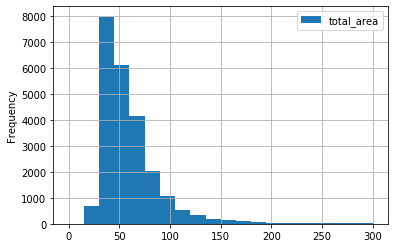

In [9]:
real_estate['total_area'].plot(kind='hist', bins=20, range=(0, 300), label='total_area', grid=True, legend=True)
real_estate['total_area'].describe()

<i> The total area has a positive skewed distribution. <i/>

count    2.369900e+04
mean     1.308310e+05
std      2.177403e+05
min      2.440000e+02
25%      6.800000e+04
50%      9.300000e+04
75%      1.360000e+05
max      1.526000e+07
Name: last_price, dtype: float64

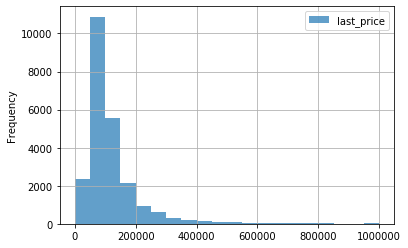

In [10]:
real_estate['last_price'].plot(kind='hist',bins=20, range=(0, 1e+06), alpha=0.7, label='last_price', grid=True, legend=True)
real_estate['last_price'].describe()

<i> The price has a positive skewed distribution. <i/>

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: bedrooms, dtype: float64

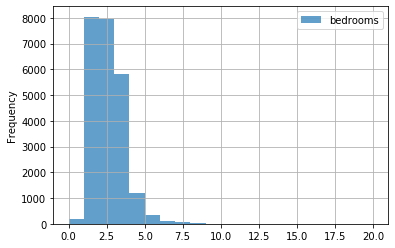

In [11]:
real_estate['bedrooms'].plot(kind='hist', bins=20, range=(0, 20), alpha=0.7, label='bedrooms', grid=True, legend=True)
real_estate['bedrooms'].describe()

<i> The number of rooms has a positive skewed distribution. <i/>

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

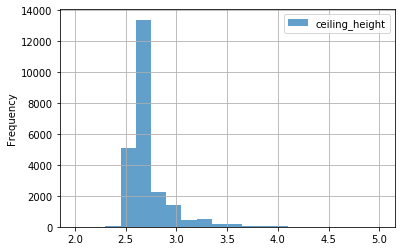

In [12]:
real_estate['ceiling_height'].plot(kind='hist', bins=20, range=(2, 5), alpha=0.7, label='ceiling_height', grid=True, legend=True)
real_estate['ceiling_height'].describe()

<i> The ceiling heaight has a positive skewed distribution. <i/>

- Examine the time it's taken to sell the apartment and plot a histogram. Calculate the mean and median and explain the average time it usually takes to complete a sale. When can a sale be considered to have happened rather quickly or taken an extra long time?

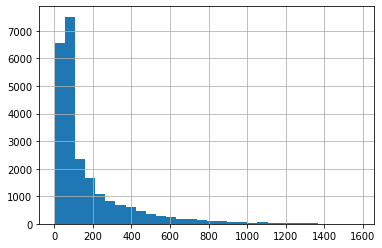

In [13]:
real_estate['days_listed'].hist(bins=30)

In [14]:
real_estate['days_listed'].mean()

169.36022616988058

In [15]:
real_estate['days_listed'].median()

95.0

<i> The mean and median are largely different due to the existance of outliers. Therefore, the average time to sell the house is around 74 days which is around the median. The sale is considered as rather quickly if the days which is equal to 5 and taken an extra long time if days listed is more than 600. <i/>

- Remove rare and outlying values and describe the patterns you've discovered.

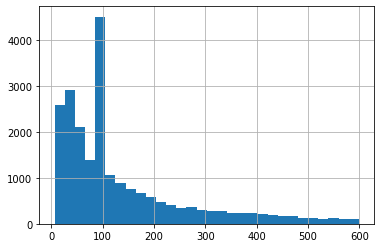

In [16]:
inf = 5
sup = 600

request = (real_estate.query('@inf < days_listed < @sup'))
request['days_listed'].hist(bins=30)

In [17]:
request['days_listed'].describe()

count    22007.000000
mean       135.716681
std        127.685662
min          6.000000
25%         46.000000
50%         95.000000
75%        174.000000
max        599.000000
Name: days_listed, dtype: float64

<i> After filtering, the mean and median decreased. The pattern is still positive skewed but looks natural. <i/>

- Which factors have had the biggest influence on an apartment’s price? Examine whether the value depends on the total square area, number of rooms, floor (top or bottom), or the proximity to the city center area. Also check whether the publication date has any effect on the price: specifically, day of the week, month, and year. Note that using scatter plot is preferable to hexbin. If you do decide to use hexbin, please use scatter plot too, and then compare the results. It is also recommended to check the hexbin documentation and carefully study its parameters.

,last_price,total_area,bedrooms,floor,city_center_dist
last_price,1.000000,0.653675,0.363343,0.026576,-0.191029
total_area,0.653675,1.000000,0.758344,-0.024754,-0.210655
bedrooms,0.363343,0.758344,1.000000,-0.150862,-0.161203
floor,0.026576,-0.024754,-0.150862,1.000000,0.013565
city_center_dist,-0.191029,-0.210655,-0.161203,0.013565,1.000000


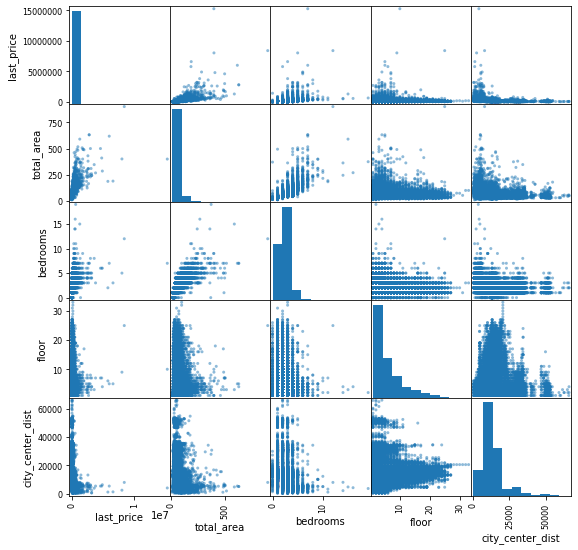

In [18]:
correlation1 = real_estate.loc[:, ['last_price','total_area','bedrooms','floor','city_center_dist']]
pd.plotting.scatter_matrix(correlation1, figsize=(9, 9))
correlation1.corr()

<i> The total area has the biggest influence on the appartement price, followed by number of the room. <i>

,last_price,day_published,month_published,year_published
last_price,1.000000,0.001550,0.002779,-0.043089
day_published,0.001550,1.000000,0.011496,-0.004799
month_published,0.002779,0.011496,1.000000,-0.269642
year_published,-0.043089,-0.004799,-0.269642,1.000000


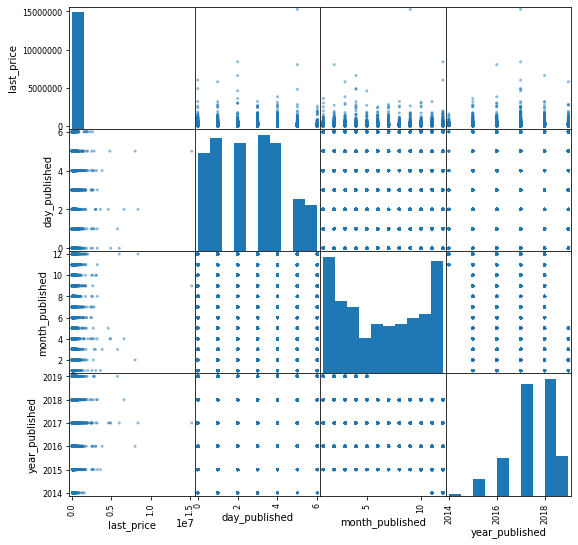

In [19]:
correlation2 = real_estate.loc[:, ['last_price','day_published','month_published','year_published']]
pd.plotting.scatter_matrix(correlation2, figsize=(9, 9))
correlation2.corr()

<i> The correlation coefficient doesn't show strong correlation. However, the patterns show that the price is increasing for the first three days and weekends. Also, the price is increasing for spring and winter but dropping during summer. <i>

- Select the 10 localities with the largest number of ads then calculate the average price per square meter in these localities. Determine which ones have the highest and lowest housing prices. You can find this data by name in the ’locality_name’ column.

In [20]:
top10 = real_estate.groupby('locality_name')['price_sqm'].agg(['count','mean']).reset_index()
top10.columns = ['locality_name','count','avg_price_psq']
top10.sort_values(by='count', ascending=False).head(10)

,locality_name,count,avg_price_psq
187,Saint Petersburg,15721,2296.980173
115,Murino village,556,1713.635239
203,Shushary village,440,1573.547285
259,Vsevolozhsk,398,1373.089507
168,Pushkin,369,2062.516436
59,Kolpino,338,1508.491516
137,Pargolovo village,327,1803.518265
26,Gatchina,307,1374.922923
75,Kudrovo village,299,1849.470888
260,Vyborg,237,1162.838183


<i> The highest housing price is located in Saint Petersburg. The lowest housing price is located in Vyborg. <i/>

- Thoroughly look at apartment offers: Each apartment has information about the distance to the city center. Select apartments in Saint Petersburg (‘locality_name’). Your task is to pinpoint which area is considered to be in the city center. In order to do that, create a column with the distance to the city center in km and round to the nearest whole number. Next, calculate the average price for each kilometer and plot a graph to display how prices are affected by the distance to the city center. Find a place on the graph where it shifts significantly. That's the city center border.

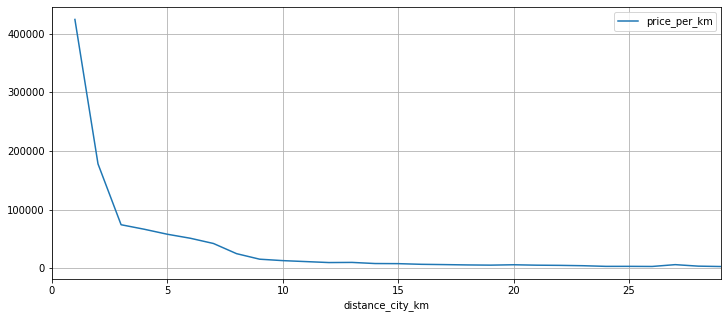

In [21]:
real_estate['distance_city_km'] = round(real_estate['city_center_dist'] / 1000)
real_estate['price_per_km'] = real_estate['last_price'] / real_estate['distance_city_km']

(real_estate
 .query('locality_name == "Saint Petersburg"')
 .pivot_table(index='distance_city_km', values='price_per_km', aggfunc='mean')
 .plot(grid=True, figsize=(12,5))
)

<i> The price is decreasing as long as the appartement is getting far from the city. The price shifts significantly around 3 km from the city center, which marks the city center border. <i/>

- Select all the apartments in the city center and examine correlations between the following parameters: total area, price, number of rooms, ceiling height. Also identify the factors that affect an apartment’s price: number of rooms, floor, distance to the city center, and ad publication date. Draw your conclusions. Are they different from the overall deductions about the entire city?

                total_area  last_price  bedrooms  ceiling_height
total_area        1.000000    0.565735  0.742487        0.028061
last_price        0.565735    1.000000  0.240780        0.031208
bedrooms          0.742487    0.240780  1.000000       -0.018625
ceiling_height    0.028061    0.031208 -0.018625        1.000000


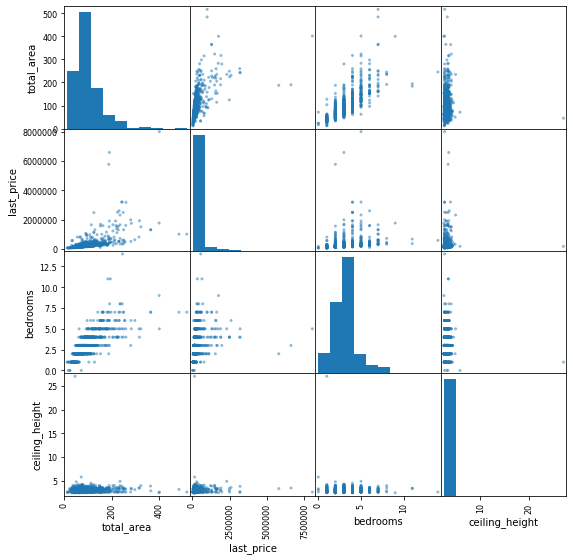

In [22]:
correlation3 = (real_estate
                .query('distance_city_km <= 3')
                .loc[:, ['total_area','last_price','bedrooms','ceiling_height']])
pd.plotting.scatter_matrix(correlation3, figsize=(9, 9))
print(correlation3.corr())

<i> A strong correlation is indentified between the appartement price and bedrooms, the appartement price and the total area. Only, 2% of the ceiling height affect the appartement price. <i/>

,last_price,floor,bedrooms,distance_city_km
last_price,1.000000,0.026576,0.363343,-0.190334
floor,0.026576,1.000000,-0.150862,0.013569
bedrooms,0.363343,-0.150862,1.000000,-0.160115
distance_city_km,-0.190334,0.013569,-0.160115,1.000000


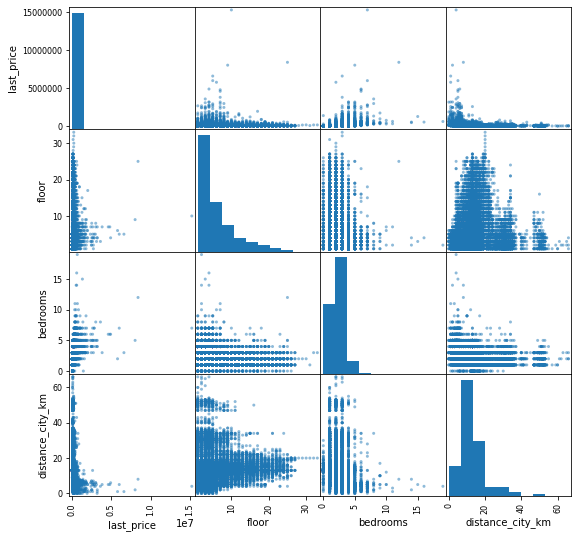

In [23]:
correlation4 = (real_estate.loc[:, ['last_price','floor','bedrooms','distance_city_km','date_posted']])
pd.plotting.scatter_matrix(correlation4, figsize=(9, 9))
correlation4.corr()

<i> Only the apartment in the city center show significcant change of price. 30 % of the overall bedrooms affect the appartment price. <i/>

### Step 5. Overall conclusion

<i> The dataset has missing values and some datatypes need to be changed in order to perform the next operations. There are some columns which need to be created for further use. Most of the columns have positive skewed distributions due to outliers. Some correlations betweens columns have been investigated and some conclusions have been drawn. The price of the appartement depends on day of the week, month, the number of rooms, the total area, and the distance from the city center. <i/>

### Project completion checklist

- [x]  file opened
- [x]  files explored (first rows printed, info() method)
- [x]  missing values determined
- [x]  missing values filled in
- [x]  clarification of the discovered missing values provided
- [x]  data types converted
- [x]  explanation of which columns had the data types changed and why
- [x]  calculated and added to the table: the price per square meter
- [x]  calculated and added to the table: the day of the week, month, and year that the ad was published
- [x]  calculated and added to the table: which floor the apartment is on (first, last, or other)
- [x]  calculated and added to the table: the ratio between the living space and the total area, as well as between the kitchen space and the total area
- [x]  the following parameters investigated: square area, price, number of rooms, and ceiling height
- [x]  histograms for each parameter created
- [x]  task completed: "Examine the time it's taken to sell the apartment and create a histogram. Calculate the mean and median and explain the average time it usually takes to complete a sale. When can a sale be considered extra quick or taken an extra slow?"
- [x]  task completed: "Remove rare and outlying values and describe the specific details you've discovered."
- [x]  task completed: "Which factors have had the biggest influence on an apartment’s value? Examine whether the value depends on price per meter, number of rooms, floor (top or bottom), or the proximity to the downtown area. Also study the correlation to the ad posting date: day of the week, month, and year. "Select the 10 places with the largest number of ads and then calculate the average price per square meter in these localities. Select the locations with the highest and lowest housing prices. You can find this data by name in the ’*locality_name’* column. "
- [x]  task completed: "Thoroughly look at apartment offers: each apartment has information about the distance to the downtown area. Select apartments in Saint Petersburg (*‘locality_name’*). Your task is to pinpoint which area is considered to be downtown. Create a column with the distance to the downtown area in km and round to the nearest whole number. Next, calculate the average price for each kilometer. Build a graph to display how prices are affected by the distance to the downtown area. Define the turning point where the graph significantly changes. This will indicate downtown. "
- [x]  task completed: "Select a segment of apartments in the downtown. Analyze this area and examine the following parameters: square area, price, number of rooms, ceiling height. Also identify the factors that affect an apartment’s price (number of rooms, floor, distance to the downtown area, and ad publication date). Draw your conclusions. Are they different from the overall conclusions about the entire city?"
- [x]  each stage has a conclusion
- [x]  overall conclusion drawn